## Contando historias de speedup.

Cisneros Aguilar Sara Kenia

In [1]:
columns = ['Proc', 'Time[s]']
data = [{'Proc':1, 'Time[s]':29278},
       {'Proc':16, 'Time[s]':178},
       {'Proc':25, 'Time[s]':78},
       {'Proc':64, 'Time[s]':16},
       {'Proc':256, 'Time[s]':2},
       {'Proc':400, 'Time[s]':1}]

Encontramos que existe un valor atìpico, dado que si dividimos $\frac{29278}{16} = 1829.875$ podemos ver que al momento de utilizar 16 procesadores el tiempo es menor que 1829.875s, ahora, sabemos que ese es el valor atìpico dado que los demàs valores no son tan alejados unos de otros, es asì como se le considera un valor extraño.

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

Creamos un archivo con formato CSV y procedemos a leerlo como un DataFrame con la ayuda de la libreria de "Pandas".\
Tomando en cuenta las listas anteriores llenaremos nuestro nuestro documento CSV, para ello primero debemos crearlo y especificar que escribiremos datos en el. En las siguientes lìneas creamos nuestro archivo $\textit{Time.csv}$ y lo renombramos $f$ para mayor comodidad, luego decimos que escribiremos en nuestro archivo $f$ cuyos nombres de sus columnas son los valores dentro de la lista $\textit{columns}$, posteriormente escribimos los nombres de las columnas en la cabecera de nuestro CSV, y finalmente escribimos en los renglones tomando los datos de nuestra lista $data$, utilizamos la funciòn $for$ para poder recorrer toda la informaciòn de nuestra lista y no dejar ni un solo dato fuera.

In [3]:
try:
    with open ('Time.csv', 'w') as f:
        w = csv.DictWriter(f, fieldnames = columns) 
        w.writeheader()
        for x in data:
            w.writerow(x)
except IOError:
    print("I/O error")

In [4]:
df = pd.read_csv('Time.csv', sep = ',')
df

,Proc,Time[s]
0,1,29278
1,16,178
2,25,78
3,64,16
4,256,2
5,400,1


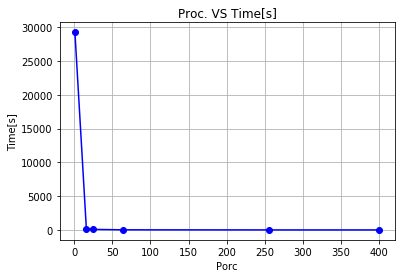

In [5]:
plt.grid()
plt.plot(df['Proc'], df['Time[s]'], 'o-', 
color = 'blue')
plt.xlabel('Porc')
plt.ylabel('Time[s]')
plt.title('Proc. VS Time[s]')
plt.show()

Con el gràfico anterior podemos notar que el tiempo que nos tardamos haciendo alguna operaciòn disminuye considerablemente conforme aumentamos en nùmero de procesadores utilizados.

Completamos las columnas de Speeup, Efficiency y Cost, tanto para el caso absoluto como para el caso relativo con $p' = 16$ y agregamos estos datos al DataFrame anterior guientes siguiendo las siguientes formulas:

Caso absoluto:\
Aceleraciòn: $\frac{t_1}{t_p}$\
Eficiencia: $e_a = \frac{S_p}{p}$\
Costo: $C_p = p * t_p$

Caso relativo:\
Aceleraciòn relativa: $S_{p'} = \frac{t_{p'}}{t_p}$\
Eficiencia relativa: $e_p' = \frac{p' * S_{p'}}{p}$

In [6]:
spd_abs = []
ef_abs = []
cst = []

for i in range(0,6):
    spd_abs.append(df.iloc[0,1]/df.iloc[i,1])
    ef_abs.append(spd_abs[i]/df.iloc[i,0])
    cst.append(df.iloc[i,0] * df.iloc[i,1])

In [7]:
spd_abs

[1.0, 164.48314606741573, 375.35897435897436, 1829.875, 14639.0, 29278.0]

In [8]:
ef_abs

[1.0,
 10.280196629213483,
 15.014358974358975,
 28.591796875,
 57.18359375,
 73.195]

In [9]:
cst

[29278, 2848, 1950, 1024, 512, 400]

In [10]:
spd_rltv = []
ef_rltv = []
p = 16

for i in range(0,6):
    spd_rltv.append(df.iloc[1,1]/df.iloc[i,1])
    ef_rltv.append((p * spd_rltv[i])/df.iloc[i,0])

In [11]:
spd_rltv

[0.006079650249333971, 1.0, 2.282051282051282, 11.125, 89.0, 178.0]

In [12]:
ef_rltv

[0.09727440398934353, 1.0, 1.4605128205128204, 2.78125, 5.5625, 7.12]

In [13]:
df['Speedup absoluto'] = spd_abs
df['Speedup relativo'] = spd_rltv
df['Efficiency absoluto'] =ef_abs
df['Efficiency relativo'] =ef_rltv
df['Cost'] = cst
df

,Proc,Time[s],Speedup absoluto,Speedup relativo,Efficiency absoluto,Efficiency relativo,Cost
0,1,29278,1.000000,0.006080,1.000000,0.097274,29278
1,16,178,164.483146,1.000000,10.280197,1.000000,2848
2,25,78,375.358974,2.282051,15.014359,1.460513,1950
3,64,16,1829.875000,11.125000,28.591797,2.781250,1024
4,256,2,14639.000000,89.000000,57.183594,5.562500,512
5,400,1,29278.000000,178.000000,73.195000,7.120000,400


Realizando algunos grficos:
#### Anàlisis absoluto

La ràpidez o Speedup es un factor de mejora del rendimiento que mide la ràpidez con wue trabaja una operaciòn con $n$ procesadores en tiempo $t$, lo que hace es comarar el tiempo que nos tardarìamos con $1$ procesador y el tiempo que nos tardarìamos con $n$ procesadores.\
Esta medida toma valores entre $1 \leq S(n) \leq n$, por lo que si el nùmero màximo de procesadores con los que contamos es $400$ esta medida no deberìa exceder este nùmero, tomando esto en cuenta podemos notar que algo extraño sucede con ayudad de la gràfica, probablemente esto se deba al valor atìpico que encontramos antes.

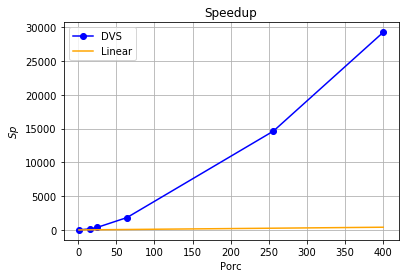

In [14]:
plt.grid()
plt.plot(df['Proc'], df['Speedup absoluto'], 'o-', 
color = 'blue')
plt.plot(df['Proc'], df['Proc'], color = 'orange')
plt.xlabel('Porc')
plt.ylabel('$Sp$')
plt.legend(('DVS', 'Linear'))
plt.title('Speedup')
plt.show()

La eficiencia es la capacidad de realizar o cumplir adecuadamente un afunciòn, es por ello que nos intereza saber que tan eficiente es utilizar cierta cantidad de procesadores, es cierto que nos tardamos menos tiempo entre mas tengamos, pero, ¿realmente nos conviene utilizar muchos procesadores?, por ejemplo, supongamos que compraremos una pizza, ¿a cuantas personas necesitamos para ello?, consideremos 3 personas que se ponen de acuerdo para dividir las tareas a realizar y asì poder comer pizza, la primera decide en que pizzerìa, la segunda decide los ingredientes que esta llevarà, y la tercera llamarà a la pizzerìa, suena bien, ¿no?, ahora consideremos a 10 personas, ¿se pondrìan de acuerdo de una manera ràpida?, no verdad, nos tardarìamos màs tiempo esperando a que se pongan de acuerdo que llamando nosotros mismos, no es muy eficiente.\
La eficiencia en este caso es una comparaciòn del grado de Sppedup conseguido frente al valor màximo, es por ello que los valores que toma son $\frac{1}{n} \leq E(n) \leq 1$, ahora, en la gràfica siguiente podemos notar que este valor es mucho màs grande que $1$, claramente algo no anda bien, gracias al tiempo que tardamos con un solo procesador (nuestro valor atìpico) esta grafica nos dice, ¡revisa tus datos!.

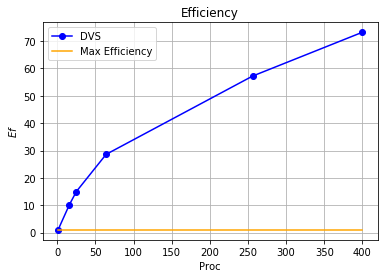

In [15]:
plt.grid(True)
m = [1,1,1,1,1,1]
plt.plot(df['Proc'], df['Efficiency absoluto'], 'o-', 
color = 'blue')
plt.plot(df['Proc'], m, color = 'orange')
plt.xlabel('Proc')
plt.ylabel('$Ef$')
plt.legend(('DVS', 'Max Efficiency'))
plt.title('Efficiency')
plt.show()

#### Anàlisis Relativo

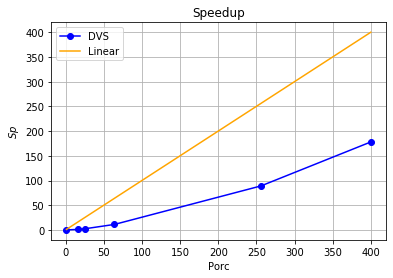

In [16]:
plt.grid()
plt.plot(df['Proc'], df['Speedup relativo'], 'o-', 
color = 'blue')
plt.plot(df['Proc'], df['Proc'], color = 'orange')
plt.xlabel('Porc')
plt.ylabel('$Sp$')
plt.legend(('DVS', 'Linear'))
plt.title('Speedup')
plt.show()

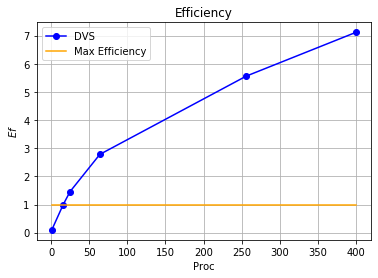

In [17]:
plt.grid(True)
m = [1,1,1,1,1,1]
plt.plot(df['Proc'], df['Efficiency relativo'], 'o-', 
color = 'blue')
plt.plot(df['Proc'], m, color = 'orange')
plt.xlabel('Proc')
plt.ylabel('$Ef$')
plt.legend(('DVS', 'Max Efficiency'))
plt.title('Efficiency')
plt.show()

Generamos otro CSV pero ahora sustituyendo el valor atípico por $430[s]$.  Agregamos estos datos al DataDrame antes creado y realizamos los gráficos correspondientes usando Matplotlib.

In [18]:
df['Time[s]'][0] = 430
df

/home/kenia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Proc,Time[s],Speedup absoluto,Speedup relativo,Efficiency absoluto,Efficiency relativo,Cost
0,1,430,1.000000,0.006080,1.000000,0.097274,29278
1,16,178,164.483146,1.000000,10.280197,1.000000,2848
2,25,78,375.358974,2.282051,15.014359,1.460513,1950
3,64,16,1829.875000,11.125000,28.591797,2.781250,1024
4,256,2,14639.000000,89.000000,57.183594,5.562500,512
5,400,1,29278.000000,178.000000,73.195000,7.120000,400


In [19]:
spd_abs = []
ef_abs = []
cst = []
spd_rltv = []
ef_rltv = []
p = 16

for i in range(0,6):
    spd_abs.append(df.iloc[0,1]/df.iloc[i,1])
    ef_abs.append(spd_abs[i]/df.iloc[i,0])
    cst.append(df.iloc[i,0] * df.iloc[i,1])
    spd_rltv.append(df.iloc[1,1]/df.iloc[i,1])
    ef_rltv.append((p * spd_rltv[i])/df.iloc[i,0])

df['Speedup absoluto'] = spd_abs
df['Speedup relativo'] = spd_rltv
df['Efficiency absoluto'] =ef_abs
df['Efficiency relativo'] =ef_rltv
df['Cost'] = cst
df

,Proc,Time[s],Speedup absoluto,Speedup relativo,Efficiency absoluto,Efficiency relativo,Cost
0,1,430,1.000000,0.413953,1.000000,6.623256,430
1,16,178,2.415730,1.000000,0.150983,1.000000,2848
2,25,78,5.512821,2.282051,0.220513,1.460513,1950
3,64,16,26.875000,11.125000,0.419922,2.781250,1024
4,256,2,215.000000,89.000000,0.839844,5.562500,512
5,400,1,430.000000,178.000000,1.075000,7.120000,400


Sì ahora generamos los mismos gràficos pero sin el vlor atìpico, se tiene:

#### Anàlisis Absoluto

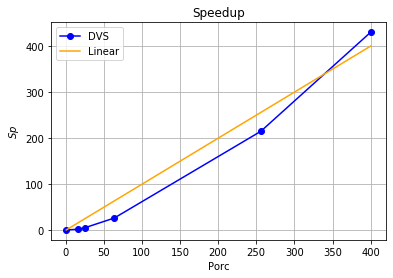

In [20]:
plt.grid()
plt.plot(df['Proc'], df['Speedup absoluto'], 'o-', 
color = 'blue')
plt.plot(df['Proc'], df['Proc'], color = 'orange')
plt.xlabel('Porc')
plt.ylabel('$Sp$')
plt.legend(('DVS', 'Linear'))
plt.title('Speedup')
plt.show()

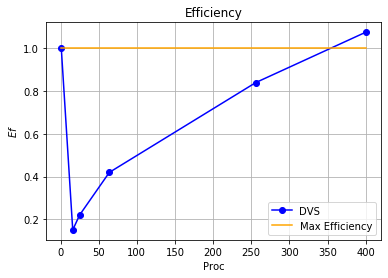

In [21]:
plt.grid(True)
m = [1,1,1,1,1,1]
plt.plot(df['Proc'], df['Efficiency absoluto'], 'o-', 
color = 'blue')
plt.plot(df['Proc'], m, color = 'orange')
plt.xlabel('Proc')
plt.ylabel('$Ef$')
plt.legend(('DVS', 'Max Efficiency'))
plt.title('Efficiency')
plt.show()

#### Anàlisis Relativo

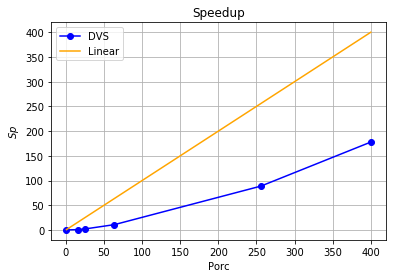

In [22]:
plt.grid()
plt.plot(df['Proc'], df['Speedup relativo'], 'o-', 
color = 'blue')
plt.plot(df['Proc'], df['Proc'], color = 'orange')
plt.xlabel('Porc')
plt.ylabel('$Sp$')
plt.legend(('DVS', 'Linear'))
plt.title('Speedup')
plt.show()

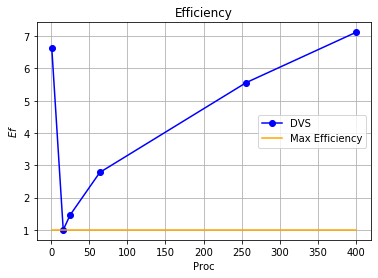

In [23]:
plt.grid(True)
m = [1,1,1,1,1,1]
plt.plot(df['Proc'], df['Efficiency relativo'], 'o-', 
color = 'blue')
plt.plot(df['Proc'], m, color = 'orange')
plt.xlabel('Proc')
plt.ylabel('$Ef$')
plt.legend(('DVS', 'Max Efficiency'))
plt.title('Efficiency')
plt.show()